Loading the libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show
%matplotlib inline
 

Loading BokehJS ...

Loading the data to the variable "data" and using head function to display the rows and colums of the data


In [146]:
data = pd.read_csv("loanapp.csv")
data.head()

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
0,True,white,reject,1,128,74,1.0,1.0,False,4583,160.0,52.0,2,2,False,2,male
1,False,white,approve,1,128,84,1.0,0.0,False,2666,143.0,37.0,2,2,False,2,male
2,True,white,approve,1,66,36,1.0,0.0,True,3000,110.0,19.0,2,6,True,2,male
3,True,white,approve,1,120,59,1.0,0.0,False,2583,134.0,31.0,2,1,False,1,male
4,False,white,approve,1,111,63,1.0,0.0,False,2208,138.0,169.0,2,6,False,2,male


<b> Decriptive Statistics <b>

Using describe function to generate descriptive statistics of the data

In [28]:
data.describe()

,occupancy,loan_amount,applicant_income,num_units,num_dependants,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,property_type
count,1988.000000,1988.000000,1988.000000,1984.000000,1985.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,1.031690,143.272636,84.684105,1.122480,0.771285,5195.220825,196.304088,4620.333873,1.708249,2.110161,1.861167
std,0.191678,80.531470,87.079777,0.437315,1.104464,5270.360946,128.136030,67142.936043,0.555335,1.663256,0.535448
min,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,25.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,100.000000,48.000000,1.000000,0.000000,2875.750000,129.000000,20.000000,1.000000,1.000000,2.000000
50%,1.000000,126.000000,64.000000,1.000000,0.000000,3812.500000,163.000000,38.000000,2.000000,1.000000,2.000000
75%,1.000000,165.000000,88.000000,1.000000,1.000000,5594.500000,225.000000,83.000000,2.000000,2.000000,2.000000
max,3.000000,980.000000,972.000000,4.000000,8.000000,81000.000000,1535.000000,1000000.000000,4.000000,6.000000,3.000000


Using info function to check the number of columns, the number of rows ,variables and the data types


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   married                  1985 non-null   object 
 1   race                     1988 non-null   object 
 2   loan_decision            1988 non-null   object 
 3   occupancy                1988 non-null   int64  
 4   loan_amount              1988 non-null   int64  
 5   applicant_income         1988 non-null   int64  
 6   num_units                1984 non-null   float64
 7   num_dependants           1985 non-null   float64
 8   self_employed            1988 non-null   bool   
 9   monthly_income           1988 non-null   int64  
 10  purchase_price           1988 non-null   float64
 11  liquid_assets            1988 non-null   float64
 12  mortage_payment_history  1988 non-null   int64  
 13  consumer_credit_history  1988 non-null   int64  
 14  filed_bankruptcy        

Using shape function to determine the shape of the data


In [3]:
data.shape

(1988, 17)

Checking for null values in each columns


In [45]:
data.isnull().sum()

married                     3
race                        0
loan_decision               0
occupancy                   0
loan_amount                 0
applicant_income            0
num_units                   4
num_dependants              3
self_employed               0
monthly_income              0
purchase_price              0
liquid_assets               0
mortage_payment_history     0
consumer_credit_history     0
filed_bankruptcy            0
property_type               0
gender                     14
dtype: int64

Replacing the missing values with the corresponding mode for each category

In [81]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['married'] = data['married'].fillna(data['married'].mode()[0])
data['num_units'] = data['num_units'].fillna(data['num_units'].mode()[0])
data['num_dependants'] = data['num_dependants'].fillna(data['num_dependants'].mode()[0])

checking the null values after replacing the missing values

In [147]:
data.isnull().sum()

married                     3
race                        0
loan_decision               0
occupancy                   0
loan_amount                 0
applicant_income            0
num_units                   4
num_dependants              3
self_employed               0
monthly_income              0
purchase_price              0
liquid_assets               0
mortage_payment_history     0
consumer_credit_history     0
filed_bankruptcy            0
property_type               0
gender                     14
dtype: int64

Since there is no null values, we can confirm that all missing values are filled.


Building a graph visualizing the distribution of loan amount.

array([[<AxesSubplot:title={'center':'loan_amount'}>]], dtype=object)

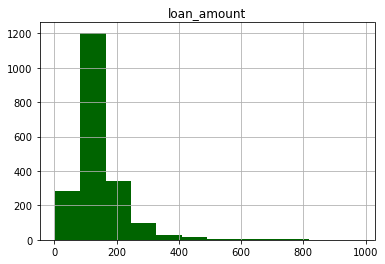

In [148]:
data.hist(column=['loan_amount'],bins=12,color="darkgreen",alpha=1)

From the histogram, It can be seen that the majority of loan amount is in the range 100 - 200.

 Building  a graph visualizing the relationship of loan amount with applicant income. 

Text(0, 0.5, 'loan_amount')

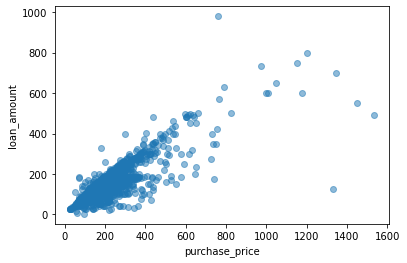

In [149]:
plt.scatter(data['purchase_price'],data['loan_amount'],alpha=0.5)
plt.xlabel("purchase_price")
plt.ylabel("loan_amount")

From the above scatter plot,we can see a linear relationship between purchase price and loan amount.
As purchase price increases, the loan amount increases.

Finding correlation between the above pair of variables:-

In [50]:
data['loan_amount'].corr(data['applicant_income'],method='pearson')

0.4334055354249043

It is seen that the variables loan_amount and applicant_income has weak correlation i.e., no strong relationship

Finding the unique variables for the categorical variables using value counts function

In [9]:
married = data['married'].value_counts() 
print(married)

True     1311
False     677
Name: married, dtype: int64


In [10]:
race = data['race'].value_counts() 
print(race)

white     1680
black      197
hispan     111
Name: race, dtype: int64


In [22]:
loan_decision = data['loan_decision'].value_counts() 
print(loan_decision)

approve    1744
reject      244
Name: loan_decision, dtype: int64


In [11]:
self_employed= data['self_employed'].value_counts() 
print(self_employed)

False    1731
True      257
Name: self_employed, dtype: int64


In [24]:
filed_bankruptcy= data['filed_bankruptcy'].value_counts() 
print(filed_bankruptcy)

False    1851
True      137
Name: filed_bankruptcy, dtype: int64


In [12]:
gender= data['gender'].value_counts() 
print(gender)

male      1619
female     369
Name: gender, dtype: int64


Building a contingency table of two potentially related categorical variables. 

In [171]:
cont_table=pd.crosstab(data['loan_decision'], data["race"])
cont_table.head()

race,black,hispan,white
loan_decision,,,
approve,133,85,1526
reject,64,26,154


In [172]:
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table)
print(f"p-value: {p_val}")

p-value: 5.164942968166758e-23


The p-value is less than the usual significance level of 0.05. Therefore, we reject the null hypothesis that there is no dependence between the loan decision and race.

Creating two subsets using two criterias and finding the descriptive statistics

In [178]:
subset_male=data[(data['gender']=='male') & (data['loan_decision']=='approve')]
subset_1.describe()

,occupancy,loan_amount,applicant_income,num_units,num_dependants,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,property_type
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000
mean,1.030175,149.083509,87.230175,1.101754,0.849825,5430.675789,207.381858,5707.505983,1.665263,1.926316,1.893333
std,0.183027,84.347750,80.952869,0.403849,1.138531,5463.593908,136.414355,74735.806847,0.564225,1.526743,0.481240
min,1.000000,2.000000,5.000000,1.000000,0.000000,0.000000,25.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,105.000000,51.000000,1.000000,0.000000,2958.000000,135.000000,21.000000,1.000000,1.000000,2.000000
50%,1.000000,130.000000,67.000000,1.000000,0.000000,3941.000000,170.000000,41.000000,2.000000,1.000000,2.000000
75%,1.000000,171.000000,93.000000,1.000000,2.000000,5885.000000,239.000000,90.000000,2.000000,2.000000,2.000000
max,3.000000,980.000000,870.000000,4.000000,8.000000,72529.000000,1535.000000,1000000.000000,4.000000,6.000000,3.000000


In [179]:
subset_female=data[(data['gender']=='female') & (data['loan_decision']=='approve')]
subset_2.describe()

,occupancy,loan_amount,applicant_income,num_units,num_dependants,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,property_type
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1.025078,118.978056,68.968652,1.109718,0.357367,4432.768025,165.290063,86.975799,1.761755,1.959248,1.639498
std,0.175544,65.366909,77.835290,0.408864,0.771465,3359.257229,101.322832,143.954951,0.462062,1.530066,0.602777
min,1.000000,25.000000,4.000000,1.000000,0.000000,0.000000,29.000000,0.760000,1.000000,1.000000,1.000000
25%,1.000000,84.000000,39.500000,1.000000,0.000000,2703.500000,114.375000,23.000000,1.000000,1.000000,1.000000
50%,1.000000,110.000000,52.000000,1.000000,0.000000,3481.000000,141.000000,39.000000,2.000000,1.000000,2.000000
75%,1.000000,137.500000,69.500000,1.000000,0.000000,4576.500000,180.000000,84.860000,2.000000,2.000000,2.000000
max,3.000000,600.000000,666.000000,4.000000,5.000000,25750.000000,1000.000000,1100.000000,3.000000,6.000000,3.000000


From the means of the above subsets, we can see that the mean loan amount of males are higher than females.

Performing independent two sample t test to whether there is a significant difference between the means of the applicant incomes of the two subsets:-

In [180]:
subset_male_loan_amount = subset_1["loan_amount"]
subset_female_loan_amount = subset_2["loan_amount"]
t_val, p_val = stats.ttest_ind(subset_1_loan_amount, subset_2_loan_amount)

print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 5.984683807547622, p-value: 2.626176536683981e-09


The p-value is smaller than the significance level ( 𝛼=0.05)

 i.e., the difference between the two means falls inside the rejection area.

Therefore we reject the null hypothesis that the mean loan amount of the males is not different from the mean loan amount of females. 

There is significant difference between the loan amounts of males and females.

Grouping the data by the variable "Married" and finding the mean of the group :-

In [19]:
data.groupby(['married']).mean()

,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type
married,,,,,,,,,,,,,
False,1.028065,122.853767,72.791728,1.163959,0.221566,0.116691,4559.505170,164.590960,3046.276796,1.818316,2.091581,0.069424,1.735598
True,1.033562,153.816934,90.825324,1.100686,1.053394,0.135774,5523.504195,212.680738,5433.176468,1.651411,2.119756,0.068650,1.926011


Grouping the data by the variable "Gender" and finding the mean of the group :-

In [20]:
data.groupby(["gender"]).mean()

,married,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type
gender,,,,,,,,,,,,,,
female,0.317073,1.021680,120.634146,70.897019,1.143631,0.384824,0.086721,4365.880759,163.989241,106.049902,1.772358,2.168022,0.067751,1.688347
male,0.737492,1.033972,148.432366,87.826436,1.117356,0.857937,0.138975,5384.242742,203.669238,5649.222561,1.693638,2.096973,0.069179,1.900556


<b>Visualizing the correlation <b>

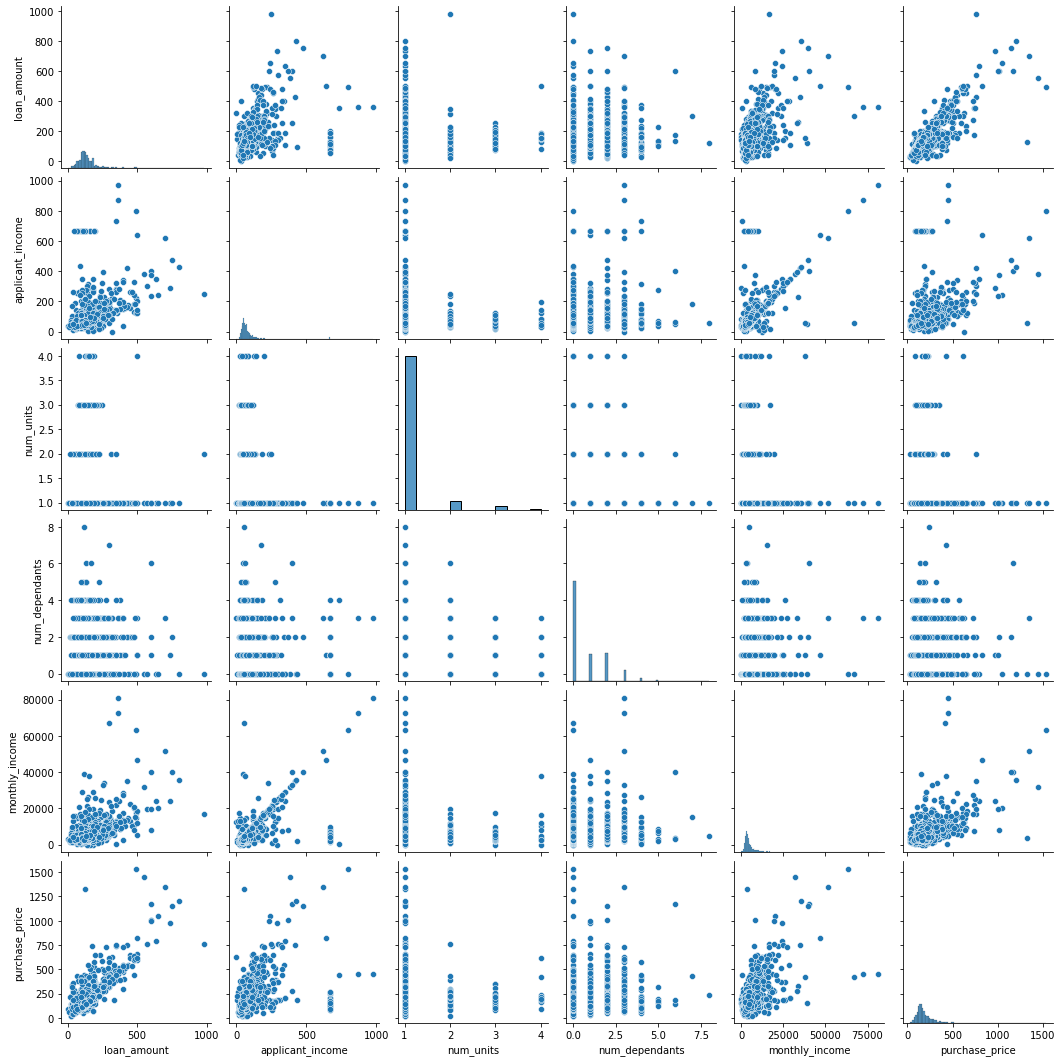

In [54]:
df = data[['loan_amount','applicant_income','num_units','num_dependants','monthly_income','purchase_price']]
sns.pairplot(df, kind="scatter")
plt.show()

For correlation matrix, categorical values are replaced by 0 and 1 .

In [177]:
data =data.replace({"gender":{"male": 1, "female": 0}})
data =data.replace({"loan_decision":{"approve": 1, "reject": 0}})
data =data.replace({"married":{True: 1, False: 0}})
data =data.replace({"self_employed":{True: 1, False: 0}})
data =data.replace({"filed_bankruptcy":{True: 1, False: 0}}) 
data.head()

,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
0,1.0,white,0,1,128,74,1.0,1.0,0,4583,160.0,52.0,2,2,0,2,1.0
1,0.0,white,1,1,128,84,1.0,0.0,0,2666,143.0,37.0,2,2,0,2,1.0
2,1.0,white,1,1,66,36,1.0,0.0,1,3000,110.0,19.0,2,6,1,2,1.0
3,1.0,white,1,1,120,59,1.0,0.0,0,2583,134.0,31.0,2,1,0,1,1.0
4,0.0,white,1,1,111,63,1.0,0.0,0,2208,138.0,169.0,2,6,0,2,1.0


For the category race, since there are 3 types, we consider 2 dummy variables:-

In [83]:
data= pd.get_dummies(data,columns =["race"],drop_first=True)
data.head()

,married,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender,race_hispan,race_white
0,1,0,1,128,74,1.0,1.0,0,4583,160.0,52.0,2,2,0,2,1,0,1
1,0,1,1,128,84,1.0,0.0,0,2666,143.0,37.0,2,2,0,2,1,0,1
2,1,1,1,66,36,1.0,0.0,1,3000,110.0,19.0,2,6,1,2,1,0,1
3,1,1,1,120,59,1.0,0.0,0,2583,134.0,31.0,2,1,0,1,1,0,1
4,0,1,1,111,63,1.0,0.0,0,2208,138.0,169.0,2,6,0,2,1,0,1


<b> Finding correlation matrix <b>

 Correlation matrix gives us an idea about the association between the variables.

Using corr() function to find the correlation matrix :-

In [84]:
data.corr()

,married,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender,race_hispan,race_white
married,1.000000,0.061163,0.013594,0.182250,0.098164,-0.068645,0.357141,0.026954,0.086701,0.177898,0.016851,-0.142463,0.008030,-0.001448,0.168565,0.344924,0.031438,0.006198
loan_decision,0.061163,1.000000,-0.034139,0.010101,-0.024389,-0.116429,-0.025125,-0.038640,0.026854,0.070511,0.002354,-0.122006,-0.285899,-0.267400,-0.071235,0.018572,-0.082631,0.221139
occupancy,0.013594,-0.034139,1.000000,-0.016503,0.030299,0.073913,0.003525,0.084933,0.085524,-0.025596,0.106296,-0.073849,-0.042528,-0.024265,0.033082,0.024938,-0.040215,0.049044
loan_amount,0.182250,0.010101,-0.016503,1.000000,0.433406,0.041205,0.137598,0.145959,0.574379,0.834429,0.014994,-0.154574,-0.004061,0.027271,0.180313,0.134240,-0.037776,0.047932
applicant_income,0.098164,-0.024389,0.030299,0.433406,1.000000,-0.055468,0.102564,0.128460,0.566113,0.450326,-0.007452,-0.057970,0.037862,0.041247,-0.020165,0.075606,-0.045195,0.053474
num_units,-0.068645,-0.116429,0.073913,0.041205,-0.055468,1.000000,-0.007449,0.046633,-0.008301,-0.010384,-0.018985,0.008080,0.069415,0.051164,0.541552,-0.023387,0.047308,-0.141157
num_dependants,0.357141,-0.025125,0.003525,0.137598,0.102564,-0.007449,1.000000,0.042216,0.143677,0.166002,0.007254,-0.090564,0.009687,0.060259,0.159671,0.166652,0.058587,-0.062726
self_employed,0.026954,-0.038640,0.084933,0.145959,0.128460,0.046633,0.042216,1.000000,0.181829,0.150422,0.041264,-0.029759,-0.038150,0.013550,0.043916,0.060554,-0.021873,0.028246
monthly_income,0.086701,0.026854,0.085524,0.574379,0.566113,-0.008301,0.143677,0.181829,1.000000,0.624947,0.004233,-0.095952,-0.000366,0.012480,0.001120,0.075143,-0.051396,0.058232
purchase_price,0.177898,0.070511,-0.025596,0.834429,0.450326,-0.010384,0.166002,0.150422,0.624947,1.000000,-0.012625,-0.193409,-0.031705,-0.004980,0.136291,0.120429,-0.075086,0.110226


<b>Performing linear regression using OLS method:-<b>

In [175]:
model = sm.OLS.from_formula('loan_amount ~  + applicant_income + purchase_price ', data=data).fit()

In [130]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2321.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:01:41   Log-Likelihood:                -10347.
No. Observations:                1988   AIC:                         2.070e+04
Df Residuals:                    1985   BIC:                         2.072e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           38.6804      1.837     21.060      0.000      35.078      42.282
applicant_income     0.0669      0.013      5.255      0.000       0.042       0.092
purchase_price       0.5040      0.009     58.281      0.000       0.487       0.521
==============================================================================
Omnibus:                      825.822   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88075.959
Skew:                          -0.969   Prob(JB):                         0.00
Kurtosis:                      35.550   Cond. No.                         471.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(1) Coefficients on the variables: 

The model is described by the line 38.6804 + 0.0669 * applicant_income + 0.5040 * purchase_price

It is clear that the loan amount is positviely impacted by applicant income,purchase price and if the individual is self employed.

(2)  Significance of the variables. The p-values on all the coefficients indicate that the variables are significant, i.e., the factors do have a significant effect on the loan amount.

(3) Quality of the model. The  𝑅2 and the adjusted 𝑅2 values are around 0.7 . This indicates that the model is a good fit.

<b>Checking the assumptions of normality and zero mean of residuals </b> 

 plotting the standardized residuals and their histogram to confirm that the assumptions of normality of the distribution of residuals and of the zero mean of residuals are valid with this model.

In [176]:
fig = figure(height=400, width=400)

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = model.get_influence().resid_studentized_internal
fig.circle(model.fittedvalues, st_resids)
show(fig)

From the above scatterplot , we can see that the  assumption of zero mean of residuals is valid.

Creating a histogram to check the normality of errors:-

In [40]:
import numpy as np

hist, edges = np.histogram(st_resids, bins=10)

fig = figure(height=400, width=400)
fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(fig)

The scatterplot and the histogram suggest the residuals are equally distributed around 0 and are normally distributed.
The results of the Jarque-Bera test on the residuals (the third table of the summary) also indicate that the errors are distributed normally: the p-value equals 0.0, therefore we cannot reject the null hypothesis of normal distribution.

Thus the assumptions of the classical linear regression method hold with the model.